In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy
from numpy import arange
from numpy import meshgrid

<IPython.core.display.Javascript object>


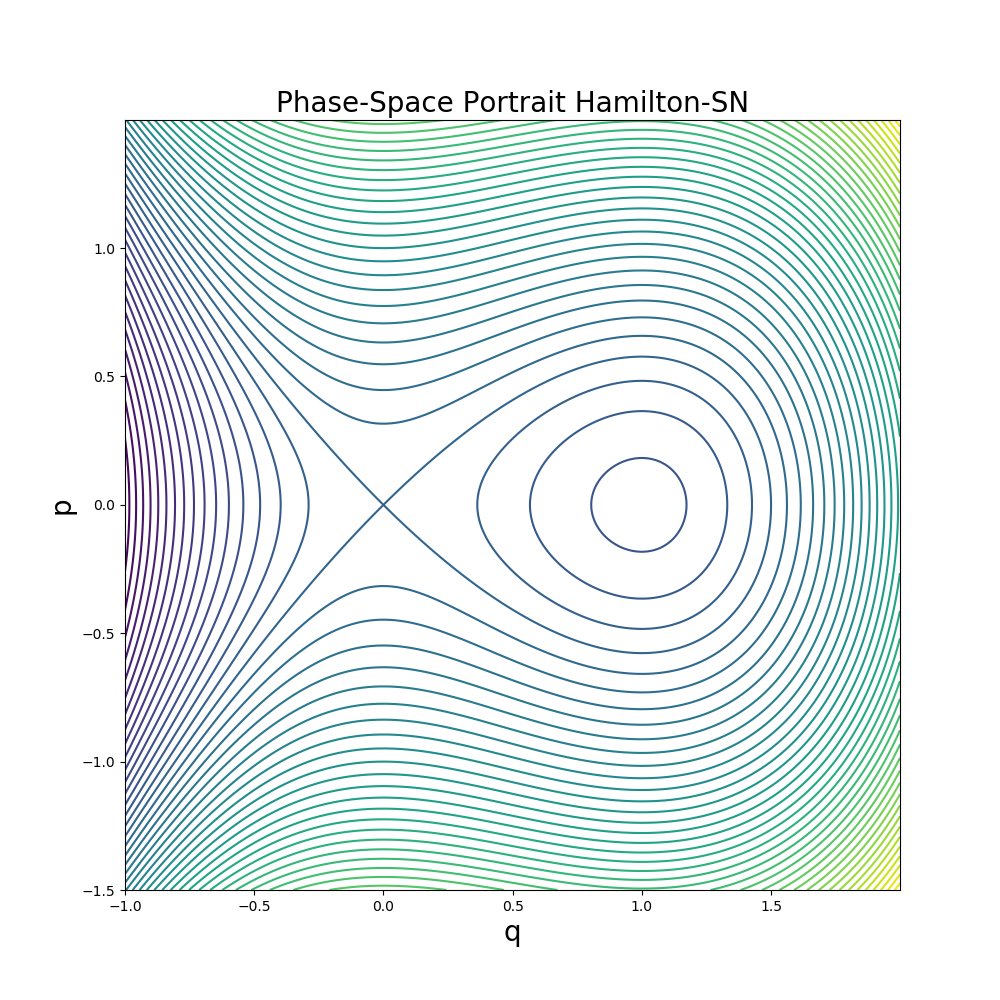

In [18]:
# Mesh of initial conditions in 2D plane
delta = 0.001
xrange = arange(-1, 2.0, delta)
yrange = arange(-1.5, 1.5, delta)
q0, p0 = meshgrid(xrange,yrange)

# Parameters for Ham Saddle-Node
MU = 0.25
ALPHA = 1

# Hamiltonian
H0 = 0.5*p0**2 - numpy.sqrt(MU)*q0**2 + ALPHA*q0**3/3

# Plot vector field
fig,ax = plt.subplots(figsize=(10,10),dpi=100)
ax.set_title('Phase-Space Portrait Hamilton-SN', fontsize=20)
ax.set_xlabel('q', fontsize=20)
ax.set_ylabel('p', fontsize=20)
ax.contour(q0,p0,H0,60)

plt.show()

<IPython.core.display.Javascript object>


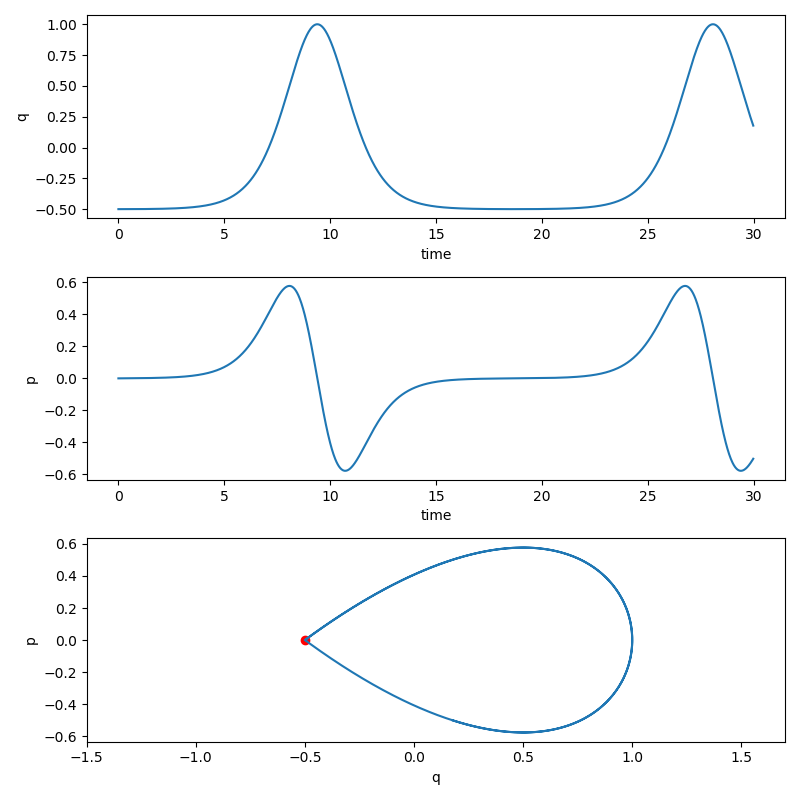

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def f(y, t, params):
    q, p = y      # unpack current values of y
    MU, ALPHA = params  # unpack parameters
    derivs = [p, MU - q**2]     # list of dy/dt=f functions
    return derivs

# Parameters
MU = 0.25
ALPHA = 1

# Initial values
q0 = -numpy.sqrt(MU)+0.001 # initial angular displacement
p0 = 0.0    # initial angular velocity

# Bundle parameters for ODE solver
params = [MU, ALPHA]

# Bundle initial conditions for ODE solver
y0 = [q0, p0]

# Make time array for solution
tStop = 30
tInc = 0.02
t = np.arange(0., tStop, tInc)

# Call the ODE solver
psoln = odeint(f, y0, t, args=(params,))

# Plot results
fig = plt.figure(1, figsize=(8,8))

# Plot theta as a function of time
ax1 = fig.add_subplot(311)
ax1.plot(t, psoln[:,0])
ax1.set_xlabel('time')
ax1.set_ylabel('q')

# Plot omega as a function of time
ax2 = fig.add_subplot(312)
ax2.plot(t, psoln[:,1])
ax2.set_xlabel('time')
ax2.set_ylabel('p')

# Plot omega vs theta
ax3 = fig.add_subplot(313)
twopi = 1.7
ax3.plot(psoln[:,0], psoln[:,1])
ax3.set_xlabel('q')
ax3.set_ylabel('p')
ax3.set_xlim(-1.5, twopi)
ax3.scatter(q0,p0,c='r')

plt.tight_layout()
plt.show()